In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.mlab as mlab
import glob
from scipy import optimize
from scipy.special import erf
import os
import numpy.polynomial.polynomial as poly
from scipy.stats import chisquare
from collections import OrderedDict

from collections import OrderedDict
import matplotlib.patches as mpatches


In [2]:
##################################################################
# [Percent Xe, Efield, Pressure, Drift time, Sigma, Marker]
##################################################################
Data = np.load("XenonArgon.npy")
#Data = np.loadtxt("XenonHelium.txt")

In [3]:
vals = Data[:,:-1].astype(float)
mark = Data[:,-1]

In [4]:
Percents = np.unique(vals[:,0])
Percents

array([ 90. ,  99. ,  99.9, 100. ])

In [5]:
COL =['b','g','r','m','y','c','k','lime','orange','steelblue','pink','blue']


In [6]:
MB_Data = np.loadtxt("/Users/austinmcdonald/Desktop/Full-XeAr-No3.txt")
Fractions = np.unique(MB_Data[:,0])[:-1]
Fractions = np.flip(Fractions)
mm = dict()
this = MB_Data[:,0]
for y in range(0,len(Fractions)):
    hold = []
    for x in range(0,len(this)):
        if this[x] == Fractions[y]:
            hold.append(MB_Data[x])
    mm[y] = np.array(hold)
    
Fractions

array([10. ,  1. ,  0.1,  0. ])

In [7]:
def MB_V(data,x):
    Vz = data[x][:,5]
    P  = data[x][:,3]/760
    E  = data[x][:,4]
    xe = str(data[x][0][0])
    ar = str(data[x][0][1])
    lab = xe+'%Xe '+ar+'%He'
    X = E/P
    Y = Vz
    Yer =Vz*data[x][:,6]/100
    drop = np.where(Y == 0)[0]
    X = np.delete(X,drop)
    Y = np.delete(Y,drop)
    Yer=np.delete(Yer,drop)
    SORT = X.argsort()
    X = X[SORT]
    Y = Y[SORT]
    Yer = Yer[SORT]
    
    Xnew = np.linspace(0, 300, 10000)
    Ynew = np.interp(Xnew, X, Y)
    return Xnew,Ynew,Yer,lab
    
###                  11    , 12    ,    13   ,    14  ,  15 , 16 ]
###              LdiffTPC  ,LerrTPC, TdiffTCP, TerrTPC, Mele, Merr]
def MB_DLtpc(data,x):
    Vz = data[x][:,11]
    P  = data[x][:,3]/760
    E  = data[x][:,4]
    xe = str(data[x][0][0])
    ar = str(data[x][0][1])
    lab = xe+'%Xe '+ar+'%He'
    X = E/P
    Y = Vz*np.sqrt(P)
    Yer =Vz*data[x][:,12]/100
    drop = np.where(Y == 0)[0]
    X = np.delete(X,drop)
    Y = np.delete(Y,drop)
    Yer=np.delete(Yer,drop)
    SORT = X.argsort()
    X = X[SORT]
    Y = Y[SORT]
    Yer = Yer[SORT]

    Xnew = np.linspace(0, 300, 1000)
    Ynew = np.interp(Xnew, X, Y)
    return Xnew,Ynew,Yer,lab

def MB_DTtpc(data,x):
    Vz = data[x][:,13]
    P  = data[x][:,3]/760
    E  = data[x][:,4]
    xe = str(data[x][0][0])
    ar = str(data[x][0][1])
    lab = xe+'%Xe '+ar+'%He'
    X = E/P
    Y = Vz*np.sqrt(P)
    Yer =Vz*data[x][:,14]/100
    drop = np.where(Y == 0)[0]
    X = np.delete(X,drop)
    Y = np.delete(Y,drop)
    Yer=np.delete(Yer,drop)
    SORT = X.argsort()
    X = X[SORT]
    Y = Y[SORT]
    Yer = Yer[SORT]

    Xnew = np.linspace(0, 300, 1000)
    Ynew = np.interp(Xnew, X, Y)
    return Xnew,Ynew,Yer,lab

####################
###       [0    , 1    ,2    , 3   , 4     , 5     , 6   , 7    , 8   , 9    , 10  ,     11  , 12    ,  13 , 14 ]
###Vals = [XePer, ArPer, Temp, Pres, Efield, Zdrift, Zerr, Tdiff, Terr, Ldiff, Lerr, LdiffTPC,LerrTPC, Mele, Merr]
###                  11    , 12    ,    13   ,    14  ,  15 , 16 ]
###              LdiffTPC  ,LerrTPC, TdiffTCP, TerrTPC, Mele, Merr]
########
def MB_DL(data,x):
    Vz = data[x][:,9]
    P  = data[x][:,3]/760
    E  = data[x][:,4]
    xe = str(data[x][0][0])
    ar = str(data[x][0][1])
    lab = xe+'%Xe '+ar+'%He'
    X = E/P
    Y = Vz*P
    Yer =Vz*data[x][:,10]/100
    drop = np.where(Y == 0)[0]
    X = np.delete(X,drop)
    Y = np.delete(Y,drop)
    Yer=np.delete(Yer,drop)
    SORT = X.argsort()
    X = X[SORT]
    Y = Y[SORT]
    Yer = Yer[SORT]

    Xnew = np.linspace(0, 300, 1000)
    Ynew = np.interp(Xnew, X, Y)
    return Xnew,Ynew,Yer,lab

def MB_DT(data,x):
    Vz = data[x][:,7]
    P  = data[x][:,3]/760
    E  = data[x][:,4]
    xe = str(data[x][0][0])
    ar = str(data[x][0][1])
    lab = xe+'%Xe '+ar+'%He'
    X = E/P
    Y = Vz*P
    Yer =Vz*data[x][:,8]/100
    drop = np.where(Y == 0)[0]
    X = np.delete(X,drop)
    Y = np.delete(Y,drop)
    Yer=np.delete(Yer,drop)
    SORT = X.argsort()
    X = X[SORT]
    Y = Y[SORT]
    Yer = Yer[SORT]

    Xnew = np.linspace(0, 300, 1000)
    Ynew = np.interp(Xnew, X, Y)
    return Xnew,Ynew,Yer,lab

In [8]:
COL =['darkblue','indigo','slateblue', 'mediumblue']

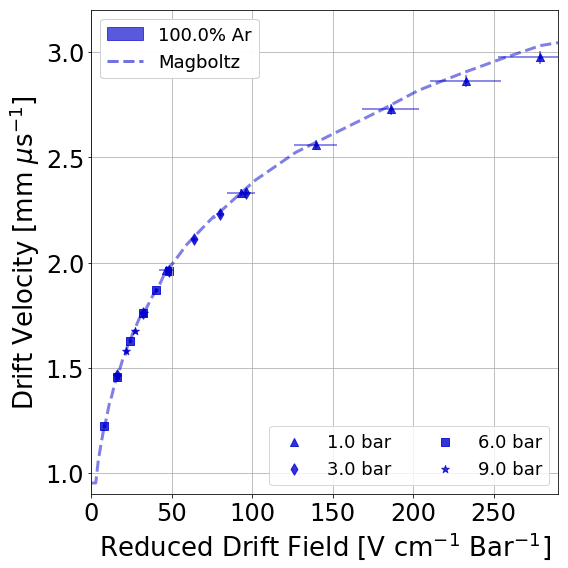

In [457]:
Pat = []
plt.figure(figsize=(8,8))
#for x in range(0,len(Percents)):
for x in [3]:
    Pc = Percents[x]
    DATA = Data[Data[:,0].astype(float)==Pc]
    vals = DATA[:,:-1].astype(float)
    mark = DATA[:,-1]
    d = 141.28
    P = vals[:,2]
    E = vals[:,1]
    dt = vals[:,3]*1e6
    V = d/(dt)
    cc = CORRECTION(dt,P,E)
    V = d/(cc)
    R = E*.9767/P
    lab = str(Pc)+'% Ar'
    color = COL[x]
    pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
    Pat.append(pat)
    LABB = np.rint(P).astype(str)
    
    MBX,MBY,Yer,lab = MB_V(mm,x)
    aa, = plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color=COL[x],linestyle='--',label='Magboltz')
    B = (.1/(d))**2+(0.5/(dt))**2
    yer = V*np.sqrt((B))
    B = (.1/(E))**2+(0.1/(P))**2
    xer = R*np.sqrt((B))
    plt.errorbar(R, V,xerr=xer,yerr=yer, alpha=0.6,color=color,fmt='.')
    for x, y, m, L in zip(R, V, mark,LABB):
        plt.scatter(x, y, alpha=0.8,marker=m,color=color,s=65,label=L+" bar") 
    
    
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels[1:], handles[1:]))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='lower right',ncol=2,fontsize=18)
Pat.append(aa)
legend1=plt.legend(handles=Pat,loc='upper left',ncol=1,fontsize=18)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)

#plt.scatter(XXX,YYY,color='lime')
#plt.plot(xx,yy,color='r')

plt.xlim(0,290)#
#plt.xlim(0,50)

plt.ylim(0.9,3.2)
#plt.xlim(0,100)#
#plt.legend(loc='upper right',fontsize=14,ncol=3)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid()
plt.xlabel(r'Reduced Drift Field [V cm$^{-1}$ Bar$^{-1}$]',fontsize=26)
plt.ylabel(r'Drift Velocity [mm $\mu$s$^{-1}$]',fontsize=26)
plt.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_MIX_PLOTS/100Ar00XE-VEL"+".pdf")
plt.show()

In [307]:
0.15/np.sqrt(3)

0.08660254037844387

In [ ]:
Pressures = P[E==300]
CorrVals = gapwidth/V[E==300]
Correction = P
for x in range(0,len(Pressures)):
    Correction[Correction==Pressures[x]] =CorrVals[x] 

In [456]:
def CORRECTION(DT,Pres,Efid):
    P = Pres
    E = Efid
    gapwidth = .397/2
    d = 14.128 
    V = (d+gapwidth)/DT
    V = V
    Pressures = P[E==300]
    CorrVals = gapwidth/V[E==300]
    CorrectionT = np.copy(P)
    for x in range(0,len(Pressures)):
        CorrectionT[CorrectionT==Pressures[x]] =CorrVals[x]
    dt = DT-CorrectionT
    
    
    return dt
    

In [148]:
CORRECTION(dt,P,E)

array([ 71.321784  ,  60.02634498,  54.58200398,  51.15517339,
        48.71064187,  46.84925402,  95.5058594 ,  79.38411919,
        71.23857724,  66.12108458,  62.49073159,  59.7381746 ,
       114.33699847,  95.85606456,  85.73898143,  79.2668223 ,
        74.62998034,  71.10893894,  95.60407833,  88.42575112,
        83.15311701,  79.10857376])

In [136]:
Correction

array([1.35346789, 1.35346789, 1.35346789, 1.35346789, 1.35346789,
       1.35346789, 1.72582686, 1.72582686, 1.72582686, 1.72582686,
       1.72582686, 1.72582686, 2.05432652, 2.05432652, 2.05432652,
       2.05432652, 2.05432652, 2.05432652, 2.28543477, 2.28543477,
       2.28543477, 2.28543477])

In [138]:
dt

array([ 72.63825865,  61.34281963,  55.89847863,  52.47164804,
        50.02711652,  48.16572867,  97.18451564,  81.06277543,
        72.91723348,  67.79974082,  64.16938783,  61.41683083,
       116.33517576,  97.85424185,  87.73715872,  81.26499959,
        76.62815764,  73.10711623,  97.82704717,  90.64871996,
        85.37608585,  81.3315426 ])

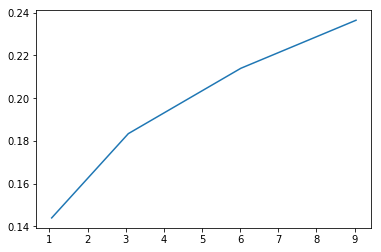

In [114]:
gapwidth=0.397

plt.plot(P[E==300],gapwidth/V[E==300])

In [126]:
Pressures = P[E==300]
CorrVals = gapwidth/V[E==300]
Correction = P
for x in range(0,len(Pressures)):
    Correction[Correction==Pressures[x]] =CorrVals[x] 

In [127]:
CorrVals = gapwidth/V[E==300]
CorrVals

array([0.1439753 , 0.18342306, 0.21401113, 0.23649508])

In [132]:
Correction = P
Correction

array([0.1439753 , 0.1439753 , 0.1439753 , 0.1439753 , 0.1439753 ,
       0.1439753 , 0.18342306, 0.18342306, 0.18342306, 0.18342306,
       0.18342306, 0.18342306, 0.21401113, 0.21401113, 0.21401113,
       0.21401113, 0.21401113, 0.21401113, 0.23649508, 0.23649508,
       0.23649508, 0.23649508, 0.23649508, 0.23649508])

In [129]:
for x in range(0,len(Pressures)):
    Correction[Correction==Pressures[x]] =CorrVals[x] 

In [130]:
Correction


array([0.1439753 , 0.1439753 , 0.1439753 , 0.1439753 , 0.1439753 ,
       0.1439753 , 0.18342306, 0.18342306, 0.18342306, 0.18342306,
       0.18342306, 0.18342306, 0.21401113, 0.21401113, 0.21401113,
       0.21401113, 0.21401113, 0.21401113, 0.23649508, 0.23649508,
       0.23649508, 0.23649508, 0.23649508, 0.23649508])

In [123]:
Correction

array([1.06, 1.06, 1.06, 1.06, 1.06, 1.06, 3.07, 3.07, 3.07, 3.07, 3.07,
       3.07, 6.02, 6.02, 6.02, 6.02, 6.02, 6.02, 9.04, 9.04, 9.04, 9.04,
       9.04, 9.04])

In [104]:
dt

array([ 72.63825865,  61.34281963,  55.89847863,  52.47164804,
        50.02711652,  48.16572867,  97.18451564,  81.06277543,
        72.91723348,  67.79974082,  64.16938783,  61.41683083,
       116.33517576,  97.85424185,  87.73715872,  81.26499959,
        76.62815764,  73.10711623,  97.82704717,  90.64871996,
        85.37608585,  81.3315426 ])

In [10]:
Xvls = np.array([ 46.50952381,  93.01904762, 139.52857143, 186.03809524,
       232.54761905, 279.05714286,  16.01147541,  32.02295082,
        48.03442623,  64.04590164,  80.05737705,  96.06885246,
         8.0986733 ,  16.1973466 ,  24.2960199 ,  32.3946932 ,
        40.4933665 ,  48.5920398 ,  16.31458797,  21.75278396,
        27.19097996,  32.62917595])

Yvls = np.array([1.94498055, 2.30312204, 2.52743909, 2.69250167, 2.82406842,
       2.93320591, 1.45372953, 1.74284682, 1.93753922, 2.08378378,
       2.20167287, 2.30034663, 1.21442203, 1.44378003, 1.61026414,
       1.73850982, 1.84370869, 1.93250681, 1.44418138, 1.55854379,
       1.65479594, 1.73708743])

In [11]:
V

array([1.94498055, 2.30312204, 2.52743909, 2.69250167, 2.82406842,
       2.93320591, 1.45372953, 1.74284682, 1.93753922, 2.08378378,
       2.20167287, 2.30034663, 1.21442203, 1.44378003, 1.61026414,
       1.73850982, 1.84370869, 1.93250681, 1.44418138, 1.55854379,
       1.65479594, 1.73708743])

In [12]:
for x in [3]:
    Pc = Percents[x]
    DATA = Data[Data[:,0].astype(float)==Pc]
    vals = DATA[:,:-1].astype(float)
    mark = DATA[:,-1]
    d = 141.28
    P = vals[:,2]
    E = vals[:,1]
    dt = vals[:,3]*1e6
    V = d/(dt)
    V = V
    R = E*.9767/P
ARX = R
ARY = V

XEX = np.array([ 45.64018692,  91.28037383, 136.92056075, 182.56074766,
       228.20093458, 273.8411215 ,  15.75322581,  31.50645161,
        47.25967742,  63.01290323,  78.76612903,  94.51935484,
         8.0852649 ,   9.70231788,  11.31937086,  12.93642384,
        14.55347682,  16.1705298 ,  24.2557947 ,  32.3410596 ,
        40.4263245 ,  48.5115894 ,   5.34299781,   6.41159737,
         8.5487965 ,   9.61739606,  10.68599562,  16.02899344,
        21.37199125,  26.71498906,  32.05798687])
XEY = np.array([0.96743113, 1.06082569, 1.13018987, 1.18725138, 1.23674627,
       1.28136371, 0.68248382, 0.88672795, 0.94442194, 0.98604772,
       1.02112401, 1.05282567, 0.19909453, 0.30009692, 0.41485967,
       0.52147565, 0.60717921, 0.6707592 , 0.81380667, 0.86531006,
       0.89821634, 0.92456306, 0.08871548, 0.11937506, 0.21828773,
       0.28719468, 0.36426948, 0.67250149, 0.79287847, 0.84443258,
       0.87529213])

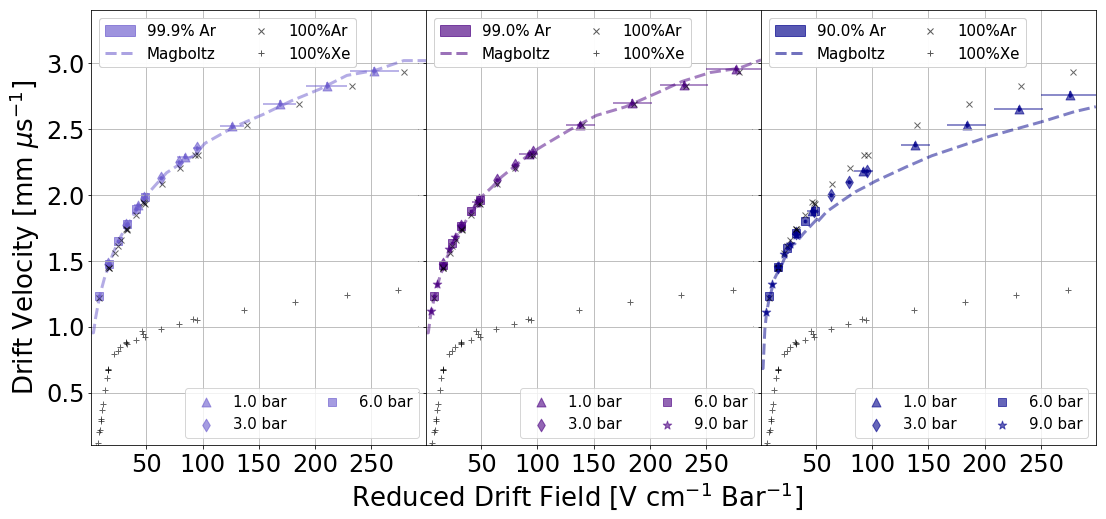

In [337]:
FFF = 13
fig = plt.figure(figsize=(18,8))
fig.subplots_adjust(hspace=0, wspace=0)
################################################################################
################################################################################
Pat = []
x=2
ax1 = fig.add_subplot(1, 3,1)
Pc = Percents[x]
DATA = Data[Data[:,0].astype(float)==Pc]
vals = DATA[:,:-1].astype(float)
mark = DATA[:,-1]
d = 141.28
P = vals[:,2]
E = vals[:,1]
dt = vals[:,3]*1e6
V = d/(dt)
gapwidth=3.97
Pressures = P[E==300]
CorrVals = gapwidth/V[E==300]
Correction = np.copy(P)
for q in range(0,len(Pressures)):
    Correction[Correction==Pressures[q]] =CorrVals[q] 
V = d/(dt-Correction)
V = V
R = E*.9767/P
lab = str(Pc)+'% Ar'
color = COL[x]
pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
Pat.append(pat)
LABB = np.rint(P).astype(str)

MBX,MBY,Yer,lab = MB_V(mm,x)
aa, = plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color=COL[x],linestyle='--',label='Magboltz')

B = (.1/(d))**2+(0.5/(dt))**2
yer = V*np.sqrt((B))
B = (.1/(E))**2+(0.1/(P))**2
xer = R*np.sqrt((B))
plt.errorbar(R, V,xerr=xer,yerr=yer, alpha=0.6,color=color,fmt='.')

for x, y, m, L in zip(R, V, mark,LABB):
    plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=80,label=L+" bar") 

bb, = plt.plot(ARX,ARY,linestyle='None',marker='x',color='k',alpha=0.6,label="100%Ar")
cc, = plt.plot(XEX,XEY,linestyle='None',marker='+',color='k',alpha=0.6,label="100%Xe")


handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels[3:], handles[3:]))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='lower right',ncol=2,fontsize=15)

Pat.append(aa)
Pat.append(bb)
Pat.append(cc)

legend1=plt.legend(handles=Pat,loc='upper left',ncol=2,fontsize=15)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)


plt.xlim(1,299)
plt.ylim(0.1,3.4)
plt.grid()
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

################################################################################
################################################################################
Pat = []
x=1
ax2 = fig.add_subplot(1, 3,2,sharey=ax1)
Pc = Percents[x]
DATA = Data[Data[:,0].astype(float)==Pc]
vals = DATA[:,:-1].astype(float)
mark = DATA[:,-1]
d = 141.28
P = vals[:,2]
E = vals[:,1]
dt = vals[:,3]*1e6
V = d/(dt)
gapwidth=3.97
Pressures = P[E==300]
CorrVals = gapwidth/V[E==300]
Correction = np.copy(P)
for q in range(0,len(Pressures)):
    Correction[Correction==Pressures[q]] =CorrVals[q] 
V = d/(dt-Correction)
V = V
R = E*.9767/P
lab = str(Pc)+'% Ar'
color = COL[x]
pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
Pat.append(pat)
LABB = np.rint(P).astype(str)

MBX,MBY,Yer,lab = MB_V(mm,x)
aa, = plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color=COL[x],linestyle='--',label='Magboltz')

B = (.1/(d))**2+(0.5/(dt))**2
yer = V*np.sqrt((B))
B = (.1/(E))**2+(0.1/(P))**2
xer = R*np.sqrt((B))
plt.errorbar(R, V,xerr=xer,yerr=yer, alpha=0.6,color=color,fmt='.')

for x, y, m, L in zip(R, V, mark,LABB):
    plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=80,label=L+" bar") 

bb, = plt.plot(ARX,ARY,linestyle='None',marker='x',color='k',alpha=0.6,label="100%Ar")
cc, = plt.plot(XEX,XEY,linestyle='None',marker='+',color='k',alpha=0.6,label="100%Xe")


handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels[3:], handles[3:]))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='lower right',ncol=2,fontsize=15)

Pat.append(aa)
Pat.append(bb)
Pat.append(cc)

legend1=plt.legend(handles=Pat,loc='upper left',ncol=2,fontsize=15)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)


plt.xlim(1,299)
#plt.ylim(501,4900)
plt.grid()

plt.xticks(fontsize=24)
plt.yticks(fontsize=0)


################################################################################
################################################################################
Pat = []
x=0
ax2 = fig.add_subplot(1, 3,3,sharey=ax1)
Pc = Percents[x]
DATA = Data[Data[:,0].astype(float)==Pc]
vals = DATA[:,:-1].astype(float)
mark = DATA[:,-1]
d = 141.28
P = vals[:,2]
E = vals[:,1]
dt = vals[:,3]*1e6
V = d/(dt)
gapwidth=3.97
Pressures = P[E==300]
CorrVals = gapwidth/V[E==300]
Correction = np.copy(P)
for q in range(0,len(Pressures)):
    Correction[Correction==Pressures[q]] =CorrVals[q] 
V = d/(dt-Correction)
V = V
R = E*.9767/P
lab = str(Pc)+'% Ar'
color = COL[x]
pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
Pat.append(pat)
LABB = np.rint(P).astype(str)

MBX,MBY,Yer,lab = MB_V(mm,x)
aa, = plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color=COL[x],linestyle='--',label='Magboltz')

B = (.1/(d))**2+(0.5/(dt))**2
yer = V*np.sqrt((B))
B = (.1/(E))**2+(0.1/(P))**2
xer = R*np.sqrt((B))
plt.errorbar(R, V,xerr=xer,yerr=yer, alpha=0.6,color=color,fmt='.')

for x, y, m, L in zip(R, V, mark,LABB):
    plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=80,label=L+" bar") 

bb, = plt.plot(ARX,ARY,linestyle='None',marker='x',color='k',alpha=0.6,label="100%Ar")
cc, = plt.plot(XEX,XEY,linestyle='None',marker='+',color='k',alpha=0.6,label="100%Xe")


handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels[3:], handles[3:]))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='lower right',ncol=2,fontsize=15)

Pat.append(aa)
Pat.append(bb)
Pat.append(cc)

legend1=plt.legend(handles=Pat,loc='upper left',ncol=2,fontsize=15)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)


plt.xlim(1,299)
#plt.ylim(501,4900)
plt.grid()
plt.xticks(fontsize=24)
plt.yticks(fontsize=0)

fig.text(0.5, 0.02, r'Reduced Drift Field [V cm$^{-1}$ Bar$^{-1}$]',fontsize=26, ha='center')
fig.text(0.06, 0.48, r" Drift Velocity [mm $\mu$s$^{-1}$]",fontsize=26, va='center', rotation='vertical')
#plt.xlabel(r'Reduced Drift Field [V cm$^{-1}$ Bar$^{-1}$]',fontsize=26)
#plt.ylabel(r'Drift Velocity [mm $\mu$s$^{-1}$]',fontsize=26)

#plt.tight_layout()
#fig.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_MIX_PLOTS/AR-ALL-VEL"+".pdf")
plt.show()

In [102]:
dt

array([ 76.68403505,  66.147683  ,  60.85773139,  57.35936013,
        54.74180658,  52.63634702,  99.01862818,  84.48659648,
        77.16910889,  72.54191297,  69.22378232,  66.67458259,
       116.52116041,  99.32324039,  90.50754618,  84.79079196,
        80.69454041,  77.55992902, 129.36337086, 109.42314138,
        99.81892033,  93.5955687 ,  89.05513693,  85.56127194])

In [14]:
V

array([1.84236523, 2.13582689, 2.3214799 , 2.46306792, 2.58084285,
       2.68407684, 1.42680223, 1.67221791, 1.83078439, 1.94756375,
       2.04091708, 2.1189484 , 1.21248363, 1.42242641, 1.56097481,
       1.66621866, 1.75079998, 1.82155917, 1.09211749, 1.29113456,
       1.41536293, 1.50947317, 1.58643291, 1.65121435])

In [15]:
def MB_D(data,x):
    Vz = data[x][:,9]
    P  = data[x][:,3]/760
    E  = data[x][:,4]
    xe = str(data[x][0][0])
    ar = str(data[x][0][1])
    lab = xe+'%Xe '+ar+'%Ar'
    X = E/P
    Y = Vz*P
    Yer =Vz*data[x][:,10]/100
    drop = np.where(Y == 0)[0]
    X = np.delete(X,drop)
    Y = np.delete(Y,drop)
    Yer=np.delete(Yer,drop)
    SORT = X.argsort()
    X = X[SORT]
    Y = Y[SORT]
    Yer = Yer[SORT]
    return X,Y,Yer,lab

In [322]:
ArNK = np.loadtxt("/Users/austinmcdonald/Desktop/ArgonPDL_NK.txt")
ArKL = np.loadtxt("/Users/austinmcdonald/Desktop/ArgonPDL_KL.txt")
ww = np.loadtxt("/Users/austinmcdonald/Desktop/ArgonPDL_W.txt")
brn = np.loadtxt("/Users/austinmcdonald/Desktop/ArgonPDL_B.txt")

(0, 5000)

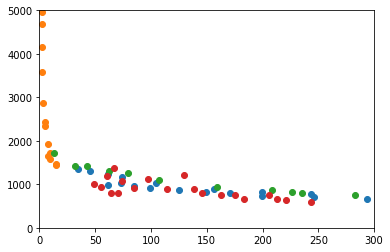

In [328]:
plt.scatter(ArNK[0],ArNK[1])
plt.scatter(ArKL[0],ArKL[1])
plt.scatter(ww[0],ww[1])
plt.scatter(brn[0],brn[1])
plt.xlim(0,300)
plt.ylim(0,5000)

In [343]:
(0.1235)**2-.025-(.15)**2

-0.03224775

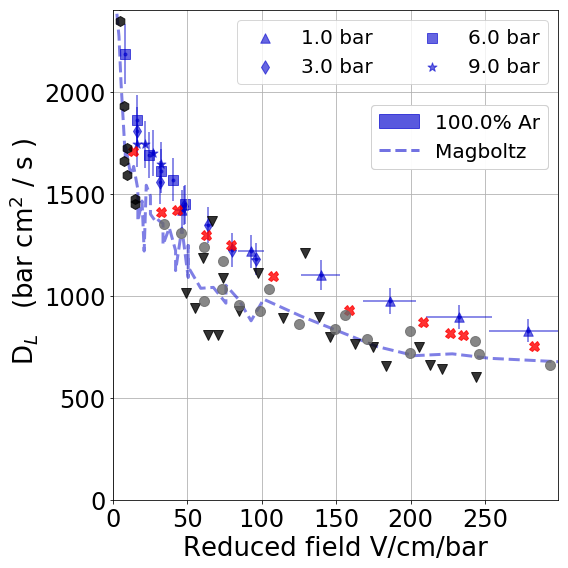

In [458]:
Pat = []
plt.figure(figsize=(8,8))
#for x in range(0,len(Percents)):
for x in [3]:
    Pc = Percents[x]
    DATA = Data[Data[:,0].astype(float)==Pc]
    vals = DATA[:,:-1].astype(float)
    mark = DATA[:,-1]
    d = 14.128
    #d = 13.5
    E = vals[:,1]
    P = vals[:,2]
    dt = vals[:,3]*1e6
    sigma1 = (vals[:,4]*1e6)**2#(0.06123092)**2#-(0.1235)**2-0.02706759#-(.15)**2
    Sigcc = CORRECTION_SIG(dt,P,E,sigma1)
    sigma = (vals[:,4]*1e6)**2-Sigcc-(0.01527)**2
    V = d/(dt)
    cc = CORRECTION(dt,P,E)
    V = d/(cc)
    R = E*.9767/P
    Dslash = sigma*V**3/(2*d)*1e6*P
    
    B = (.062/(sigma))**2+9*(0.5/dt)**2+4*(0.1/(d))**2+(0.1/(P))**2
    B = (.062)**2+(3*4.6e-3)**2+(2*0.01)**2
    DeltaD = Dslash*np.sqrt((B))
    B = (.1/(E))**2+(0.1/(P))**2
    xer = R*np.sqrt((B))
    SORT = R.argsort()
    lab = str(Pc)+'% Ar'
    color = COL[x]
    pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
    Pat.append(pat)
    LABB = np.rint(P).astype(str)
    
    #plt.plot(R[SORT], Dslash[SORT], alpha=0.6,color=color)
    plt.errorbar(R, Dslash,xerr=xer,yerr=DeltaD, alpha=0.6,color=color,fmt='.')
    
    MBX,MBY,Yer,lab = MB_D(mm,x)
    aa, = plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color=COL[x],linestyle='--',label='Magboltz')


    for x, y, m, L in zip(R, Dslash, mark,LABB):
        plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=90,label=L+" bar") 

        
plt.errorbar(ww[0],ww[1],fmt='X',color='r',alpha=0.8,ms=10)
lb1 = mpatches.Patch(color='r', label=r'E. B. Wagner $\it{et. al}$',alpha=0.8)

plt.errorbar(brn[0],brn[1],fmt='v',color='k',alpha=0.8,ms=10)
lb1 = mpatches.Patch(color='lime', label=r'brown $\it{et. al}$',alpha=0.8)

plt.errorbar(ArNK[0],ArNK[1],fmt='o',color='dimgrey',alpha=0.8,ms=10)
lb1 = mpatches.Patch(color='dimgrey', label=r'Y. Nakamura and M. Kurachi$',alpha=0.8)
                     
#cc, = plt.plot(ArKL[0],ArKL[1])
plt.errorbar(ArKL[0],ArKL[1],fmt='h',color='k',alpha=0.8,ms=10)
lb1 = mpatches.Patch(color='k', label=r'A. G. ROBERTSON and J. A. REES$',alpha=0.8)

#lb1 = mpatches.Patch(color='dimgrey', label=r'H Kusano $\it{et. al}$ [10 bar]',alpha=0.8
#plt.errorbar(xdata,ydata,xerr=xerr,yerr=yerr,fmt='.',label='H Kusano et al',color='blue')
#plt.plot(XX,YY,color='r',label="Magboltz",alpha=0.8)
   
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels[1:], handles[1:]))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=2,fontsize=20)
Pat.append(aa)
legend1=plt.legend(handles=Pat,loc='center right',bbox_to_anchor=(1, 0.74),ncol=1,fontsize=20)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)

plt.xlim(0,299)#
plt.ylim(0,2400)#
#plt.legend(loc='upper right',fontsize=14,ncol=3)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid()
plt.xlabel("Reduced field V/cm/bar",fontsize=26)
plt.ylabel(r" D$_L$   (bar cm$^2$ / s )",fontsize=26)
plt.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_MIX_PLOTS/ARXE-DIFF"+".pdf")
plt.show()

In [321]:
np.sqrt(0.1)

0.31622776601683794

In [163]:
CORRECTION(dt,P,E)

array([ 71.321784  ,  60.02634498,  54.58200398,  51.15517339,
        48.71064187,  46.84925402,  95.5058594 ,  79.38411919,
        71.23857724,  66.12108458,  62.49073159,  59.7381746 ,
       114.33699847,  95.85606456,  85.73898143,  79.2668223 ,
        74.62998034,  71.10893894,  95.60407833,  88.42575112,
        83.15311701,  79.10857376])

In [200]:
dd,ccc = CORRECTION(dt,P,E,sigma)

In [433]:
def CORRECTION2(DT,Pres,Efid):
    P = Pres
    E = Efid
    gapwidth = .397
    d = 14.128 
    V = (d+gapwidth)/DT
    Pressures = P[E==300]
    CorrVals = gapwidth/V[E==300]
    CorrectionT = np.copy(P)
    for x in range(0,len(Pressures)):
        CorrectionT[CorrectionT==Pressures[x]] =CorrVals[x]
    dt = DT-CorrectionT
    cc  = CorrectionT
    return cc

In [434]:
def CORRECTION_SIG(DT,Pres,Efid,Sigma):
    P = Pres
    E = Efid
    t1 = CORRECTION2(DT,P,E)
    gapwidth = .397
    d = 14.128 
    dfull = d+gapwidth
    t2 = DT+0.5*t1
    D300 = Sigma[E==300]*dfull**2/(2*(t2[E==300])**3)
    
    sigmacor = np.sqrt(2*t1[E==300]**3*D300/gapwidth**2)
    Pressures = P[E==300]
    CorrectionT = np.copy(P)
    for x in range(0,len(Pressures)):
        CorrectionT[CorrectionT==Pressures[x]] =sigmacor[x]
    cc  = CorrectionT
    return cc

In [435]:
t1 = CORRECTION2(dt,P,E)
t1

array([1.31647465, 1.31647465, 1.31647465, 1.31647465, 1.31647465,
       1.31647465, 1.67865624, 1.67865624, 1.67865624, 1.67865624,
       1.67865624, 1.67865624, 1.99817729, 1.99817729, 1.99817729,
       1.99817729, 1.99817729, 1.99817729, 2.22296884, 2.22296884,
       2.22296884, 2.22296884])

In [436]:
gapwidth = .397
d = 14.128 
dfull = d+gapwidth

In [437]:
t4 = dt+0.5*t1
d4 = dfull

In [438]:
D300 = sigma[E==300]*dfull**2/(2*(t4[E==300])**3)
D300

array([0.00076902, 0.00037639, 0.00023507, 0.00017974])

In [448]:
sigmacor = np.sqrt(2*t1[E==300]**3*D300/gapwidth**2)
sigmacor

array([0.14921448, 0.15031038, 0.15426858, 0.15828712])

In [440]:
sigmacor**2

array([0.00290041, 0.00294317, 0.00310022, 0.00326384])

In [441]:
CORRECTION_SIG(dt,P,E,sigma)

array([0.14921448, 0.14921448, 0.14921448, 0.14921448, 0.14921448,
       0.14921448, 0.15031038, 0.15031038, 0.15031038, 0.15031038,
       0.15031038, 0.15031038, 0.15426858, 0.15426858, 0.15426858,
       0.15426858, 0.15426858, 0.15426858, 0.15828712, 0.15828712,
       0.15828712, 0.15828712])

In [447]:
#P = Pres
#E = Efid
t1 = CORRECTION2(dt,P,E)
gapwidth = .397
d = 14.128 
dfull = d+gapwidth
t2 = dt+0.5*t1
D300 = sigma[E==300]*dfull**2/(2*(t2[E==300])**3)

sigmacor = np.sqrt(2*t1[E==300]**3*D300/gapwidth**2)
sigmacor

array([0.14921448, 0.15031038, 0.15426858, 0.15828712])

In [446]:
dt

array([ 72.63825865,  61.34281963,  55.89847863,  52.47164804,
        50.02711652,  48.16572867,  97.18451564,  81.06277543,
        72.91723348,  67.79974082,  64.16938783,  61.41683083,
       116.33517576,  97.85424185,  87.73715872,  81.26499959,
        76.62815764,  73.10711623,  97.82704717,  90.64871996,
        85.37608585,  81.3315426 ])

In [404]:
sigma[E==300]

array([0.96872425, 0.98123301, 1.02717479, 1.07503855])

In [385]:
sigma[E==300]

array([1.01104409, 1.02355285, 1.06949463, 1.11735839])

In [390]:
D300 = (1e-6)**2*sigma[E==300]*dfull**2/(2*(1e-6*t4[E==300])**3)
D300

array([895.76308555, 437.6403314 , 271.62690608, 206.46878629])

In [387]:
t1[E==300]/dt[E==300]

array([0.02733219, 0.02733219, 0.02733219, 0.02733219])

In [388]:
gapwidth

0.397

In [384]:
(2*(t1[E==300])**3*(D300/1e6))/gapwidth**2

array([0.02706759, 0.02740247, 0.02863242, 0.02991383])

In [374]:
cc[E==300]/dt[E==300]

array([0.01385544, 0.01385544, 0.01385544, 0.01385544])

In [375]:
dt[E==300]

array([48.16572867, 61.41683083, 73.10711623, 81.3315426 ])

In [376]:
np.sqrt((dfull)/d)

1.01395277330878

In [282]:
v300 = dfull/(1e-6*dt[E==300])
v300

array([301562.96606094, 236498.68941371, 198681.06894271, 178589.99761796])

In [283]:
DS300 = D300/v300**2
DS300

array([9.19525007e-09, 7.31314684e-09, 6.45793754e-09, 6.09914746e-09])

In [284]:
T = gapwidth/v300
T

array([1.31647465e-06, 1.67865624e-06, 1.99817729e-06, 2.22296884e-06])

In [287]:
(2*T*DS300)*1e6**2

array([0.02421063, 0.02455252, 0.02580821, 0.02711643])

In [285]:
dt

array([ 72.63825865,  61.34281963,  55.89847863,  52.47164804,
        50.02711652,  48.16572867,  97.18451564,  81.06277543,
        72.91723348,  67.79974082,  64.16938783,  61.41683083,
       116.33517576,  97.85424185,  87.73715872,  81.26499959,
        76.62815764,  73.10711623,  97.82704717,  90.64871996,
        85.37608585,  81.3315426 ])

In [308]:
sigma[E==200]

array([1.41560239, 1.4505878 , 1.51096242, 1.52484797])

In [261]:
aa = sigma[E==300]*dfull**2/(2*(1e-6*dt[E==300])**3)

aa*2*gapwidth/(dfull/(dt[E==300]*1e-6)**2)

array([1.06047440e-07, 8.43414255e-08, 7.44784249e-08, 7.03405528e-08])

In [262]:
aa/(dfull/(dt[E==300]*1e-6)**2)*1e6## Ds

array([0.13356101, 0.10622346, 0.09380154, 0.08859012])

In [264]:
vsqrd = (dfull/(dt[E==300]*1e-6))**2
2*aa/vsqrd*(gapwidth/(dt[E==300])*1e-6)

array([1.51581399e-16, 9.45447447e-17, 7.01382118e-17, 5.95429883e-17])

In [192]:
sigma[E==300]

array([0.99579184, 1.0083006 , 1.05424238, 1.10210614])

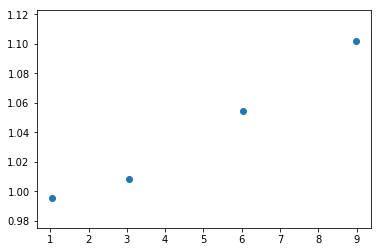

In [178]:
plt.scatter(P[E==300],sigma[E==300])

In [188]:
Pressures = P[E==300]

0.397/14.1*sigma[E==300]

array([0.02803754, 0.02838974, 0.02968328, 0.03103093])

In [ ]:
-0.1235

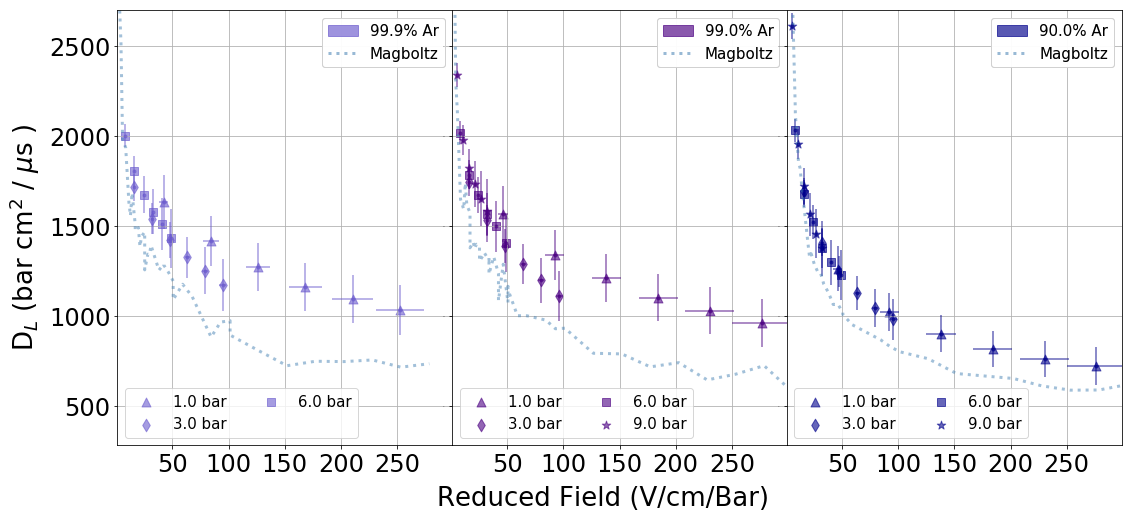

In [459]:
FFF = 13
fig = plt.figure(figsize=(18,8))
fig.subplots_adjust(hspace=0, wspace=0)
################################################################################
################################################################################
Pat = []
x=2
ax1 = fig.add_subplot(1, 3,1)
Pc = Percents[x]
DATA = Data[Data[:,0].astype(float)==Pc]
vals = DATA[:,:-1].astype(float)
mark = DATA[:,-1]
d = 14.128
P = vals[:,2]
E = vals[:,1]
dt = vals[:,3]*1e6
V = d/(dt)
cc = CORRECTION(dt,P,E)
V = d/(cc)
V = V
R = E*.9767/P
#sigma = (vals[:,4]*1e6)**2
sigma1 = (vals[:,4]*1e6)**2
Sigcc = CORRECTION_SIG(dt,P,E,sigma1)
sigma = (vals[:,4]*1e6)**2-Sigcc-(0.01527)**2
Dslash = sigma*V**3/(2*d)*1e6*P

lab = str(Pc)+'% Ar'
color = COL[x]
pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
Pat.append(pat)
LABB = np.rint(P).astype(str)

MBX,MBY,Yer,lab = MB_D(mm,x)
aa, = plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color='steelblue',linestyle=':',label='Magboltz')

B = (.1/(sigma))**2+9*(0.5/dt)**2+4*(0.1/(d))**2+(0.1/(P))**2
yer = Dslash*np.sqrt((B))
B = (.1/(E))**2+(0.1/(P))**2
xer = R*np.sqrt((B))
plt.errorbar(R, Dslash,xerr=xer,yerr=yer, alpha=0.6,color=color,fmt='.')

for x, y, m, L in zip(R, Dslash, mark,LABB):
    plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=80,label=L+" bar") 

#bb, = plt.plot(ARX,ARY,linestyle='None',marker='x',color='k',alpha=0.6,label="100%Ar")
#cc, = plt.plot(XEX,XEY,linestyle='None',marker='+',color='k',alpha=0.6,label="100%Xe")


handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels[1:], handles[1:]))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='lower left',ncol=2,fontsize=15)

Pat.append(aa)
#Pat.append(bb)
#Pat.append(cc)

legend1=plt.legend(handles=Pat,loc='upper right',ncol=1,fontsize=15)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)


plt.xlim(1,299)
plt.ylim(280,2700)
plt.grid()
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

################################################################################
################################################################################
Pat = []
x=1
ax2 = fig.add_subplot(1, 3,2,sharey=ax1)
Pc = Percents[x]
DATA = Data[Data[:,0].astype(float)==Pc]
vals = DATA[:,:-1].astype(float)
mark = DATA[:,-1]
d = 14.128
P = vals[:,2]
E = vals[:,1]
dt = vals[:,3]*1e6
V = d/(dt)
cc = CORRECTION(dt,P,E)
V = d/(cc)
V = V
R = E*.9767/P
#sigma = (vals[:,4]*1e6)**2
sigma1 = (vals[:,4]*1e6)**2
Sigcc = CORRECTION_SIG(dt,P,E,sigma1)
sigma = (vals[:,4]*1e6)**2-Sigcc-(0.01527)**2
Dslash = sigma*V**3/(2*d)*1e6*P

lab = str(Pc)+'% Ar'
color = COL[x]
pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
Pat.append(pat)
LABB = np.rint(P).astype(str)

MBX,MBY,Yer,lab = MB_D(mm,x)
aa, = plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color='steelblue',linestyle=':',label='Magboltz')

B = (.1/(sigma))**2+9*(0.5/dt)**2+4*(0.1/(d))**2+(0.1/(P))**2
yer = Dslash*np.sqrt((B))
B = (.1/(E))**2+(0.1/(P))**2
xer = R*np.sqrt((B))
plt.errorbar(R, Dslash,xerr=xer,yerr=yer, alpha=0.6,color=color,fmt='.')

for x, y, m, L in zip(R, Dslash, mark,LABB):
    plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=80,label=L+" bar")  

#bb, = plt.plot(ARX,ARY,linestyle='None',marker='x',color='k',alpha=0.6,label="100%Ar")
#cc, = plt.plot(XEX,XEY,linestyle='None',marker='+',color='k',alpha=0.6,label="100%Xe")


handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels[1:], handles[1:]))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='lower left',ncol=2,fontsize=15)

Pat.append(aa)
#Pat.append(bb)
#Pat.append(cc)

legend1=plt.legend(handles=Pat,loc='upper right',ncol=1,fontsize=15)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)


plt.xlim(1,299)
#plt.ylim(501,4900)
plt.grid()

plt.xticks(fontsize=24)
plt.yticks(fontsize=0)


################################################################################
################################################################################
Pat = []
x=0
ax2 = fig.add_subplot(1, 3,3,sharey=ax1)
Pc = Percents[x]
DATA = Data[Data[:,0].astype(float)==Pc]
vals = DATA[:,:-1].astype(float)
mark = DATA[:,-1]
d = 14.128
P = vals[:,2]
E = vals[:,1]
dt = vals[:,3]*1e6
V = d/(dt)
cc = CORRECTION(dt,P,E)
V = d/(cc)
V = V
R = E*.9767/P
#sigma = (vals[:,4]*1e6)**2
sigma1 = (vals[:,4]*1e6)**2
Sigcc = CORRECTION_SIG(dt,P,E,sigma1)
sigma = (vals[:,4]*1e6)**2-Sigcc-(0.01527)**2
Dslash = sigma*V**3/(2*d)*1e6*P

lab = str(Pc)+'% Ar'
color = COL[x]
pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
Pat.append(pat)
LABB = np.rint(P).astype(str)

MBX,MBY,Yer,lab = MB_D(mm,x)
aa, = plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color='steelblue',linestyle=':',label='Magboltz')

B = (.1/(sigma))**2+9*(0.5/dt)**2+4*(0.1/(d))**2+(0.1/(P))**2
yer = Dslash*np.sqrt((B))
B = (.1/(E))**2+(0.1/(P))**2
xer = R*np.sqrt((B))
plt.errorbar(R, Dslash,xerr=xer,yerr=yer, alpha=0.6,color=color,fmt='.')

for x, y, m, L in zip(R, Dslash, mark,LABB):
    plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=80,label=L+" bar") 

#bb, = plt.plot(ARX,ARY,linestyle='None',marker='x',color='k',alpha=0.6,label="100%Ar")
#cc, = plt.plot(XEX,XEY,linestyle='None',marker='+',color='k',alpha=0.6,label="100%Xe")


handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels[1:], handles[1:]))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='lower left',ncol=2,fontsize=15)

Pat.append(aa)
#Pat.append(bb)
#Pat.append(cc)

legend1=plt.legend(handles=Pat,loc='upper right',ncol=1,fontsize=15)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)


plt.xlim(1,299)
#plt.ylim(501,4900)
plt.grid()
plt.xticks(fontsize=24)
plt.yticks(fontsize=0)

fig.text(0.5, 0.02, r'Reduced Field (V/cm/Bar)',fontsize=26, ha='center')
fig.text(0.04, 0.48, r" D$_L$ (bar cm$^2$ / $\mu$s )",fontsize=26, va='center', rotation='vertical')


#plt.tight_layout()
#fig.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_MIX_PLOTS/AR-ALL-DIF"+".pdf")
plt.show()

In [454]:
Dslash

array([1.42498158e+09, 7.36444936e+08, 5.05169397e+08, 3.83061588e+08,
       3.08660449e+08, 2.59761045e+08, 2.02848090e+09, 1.04201155e+09,
       7.00445848e+08, 5.25496094e+08, 4.21923731e+08, 3.53556237e+08,
       2.51979060e+09, 1.28459459e+09, 8.78769679e+08, 6.51240367e+08,
       5.28288302e+08, 4.41766550e+08, 3.30424937e+09, 1.48925411e+09,
       9.91048093e+08, 7.41856158e+08, 5.93983262e+08, 4.96415074e+08])

In [188]:
(vals[:,4]*1e6-0.1235)**2

array([4.83849556, 2.469007  , 1.68816492, 1.28171598, 1.03701206,
       0.87782027, 4.83002236, 2.44802546, 1.6393223 , 1.23130971,
       0.99277409, 0.83698474, 4.81622833, 2.42243978, 1.65121095,
       1.22521759, 0.99790967, 0.83960616, 5.6676588 , 2.5124487 ,
       1.66519602, 1.24783633, 1.00327291, 0.84363097])

In [96]:
x=2
ax2 = fig.add_subplot(1, 3,3,sharey=ax1)
Pc = Percents[x]
DATA = Data[Data[:,0].astype(float)==Pc]
vals = DATA[:,:-1].astype(float)
mark = DATA[:,-1]
d = 14.128
P = vals[:,2]
E = vals[:,1]
dt = vals[:,3]*1e6
V = d/(dt)
V = V
R = E*.9767/P
sigma = (vals[:,4]*1e6)**2-(0.1235)**2

In [97]:
dt

array([ 74.80074121,  63.06356202,  57.41780691,  53.85915302,
        51.32394816,  49.41070866,  97.61360777,  81.46589036,
        73.31389887,  68.17565621,  64.54124015,  61.79045064,
       116.35398069,  97.74313324,  87.82727747,  81.35508202,
        76.71443601,  73.18811593])

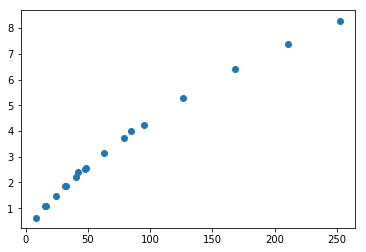

In [100]:
plt.scatter(R,1/(dt**3)*1e6)

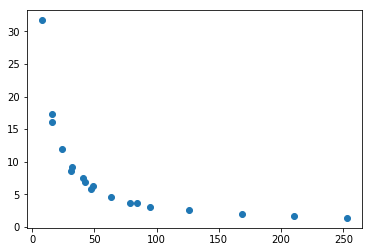

In [99]:
plt.scatter(R,sigma*P)
#plt.ylim(0,5)

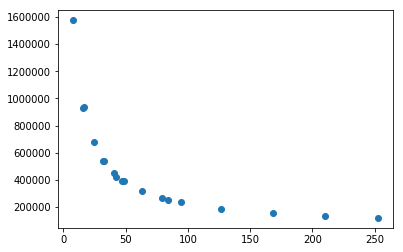

In [45]:
plt.scatter(R,dt**3)

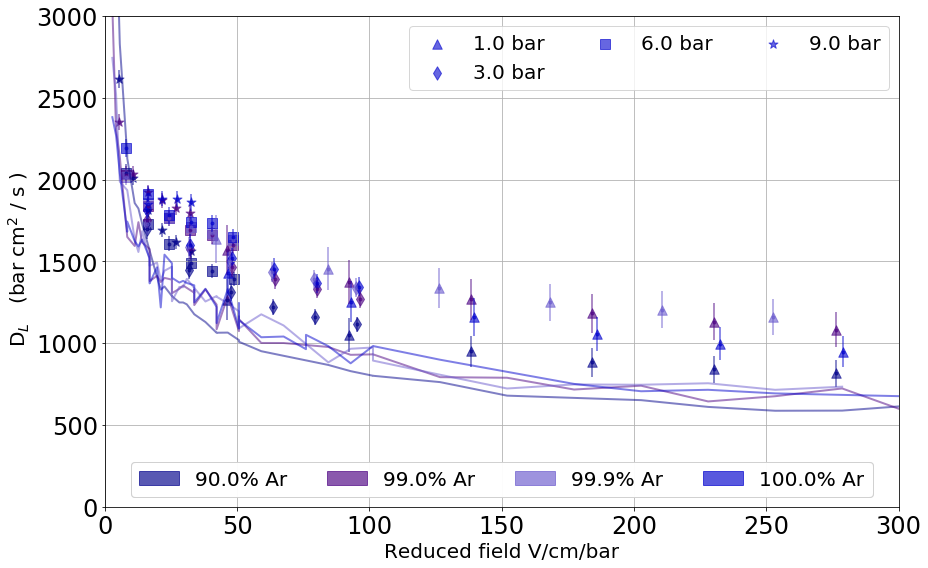

In [143]:
Pat = []
plt.figure(figsize=(13,8))
for x in range(0,len(Percents)):
#for x in [3]:
    Pc = Percents[x]
    DATA = Data[Data[:,0].astype(float)==Pc]
    vals = DATA[:,:-1].astype(float)
    mark = DATA[:,-1]
    d = d = 14.128
    E = vals[:,1]
    P = vals[:,2]
    dt = vals[:,3]*1e6
    sigma = (vals[:,4]*1e6)**2
    
    V = d/(dt)
    R = E*.9767/P
    Dslash = sigma*V**3/(2*d)*1e6*P
    
    B = (.01/(sigma))**2+9*(0.5/dt)**2+4*(0.1/(d))**2+(0.1/(P))**2
    
    DeltaD = Dslash*np.sqrt((B))
    
    SORT = R.argsort()
    lab = str(Pc)+'% Ar'
    color = COL[x]
    pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
    Pat.append(pat)
    LABB = np.rint(P).astype(str)
    
    #plt.plot(R[SORT], Dslash[SORT], alpha=0.6,color=color)
    plt.errorbar(R, Dslash,yerr=DeltaD, alpha=0.6,color=color,fmt='.')
    
    MBX,MBY,Yer,lab = MB_D(mm,x)
    plt.plot(MBX,MBY,linewidth=2,alpha=0.5,color=color)
    for x, y, m, L in zip(R, Dslash, mark,LABB):
        plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=90,label=L+" bar") 

        
#plt.errorbar(xdata,ydata,xerr=xerr,yerr=yerr,fmt='.',label='H Kusano et al',color='blue')
#plt.plot(XX,YY,color='r',label="Magboltz",alpha=0.8)
   
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=3,fontsize=20)

legend1=plt.legend(handles=Pat,loc='lower center',ncol=5,fontsize=20)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)

plt.xlim(0,300)#
plt.ylim(0,3000)#
#plt.legend(loc='upper right',fontsize=14,ncol=3)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid()
plt.xlabel("Reduced field V/cm/bar",fontsize=20)
plt.ylabel(r" D$_L$   (bar cm$^2$ / s )",fontsize=20)
plt.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_MIX_PLOTS/ARXE-diff-v0"+".pdf")
plt.show()

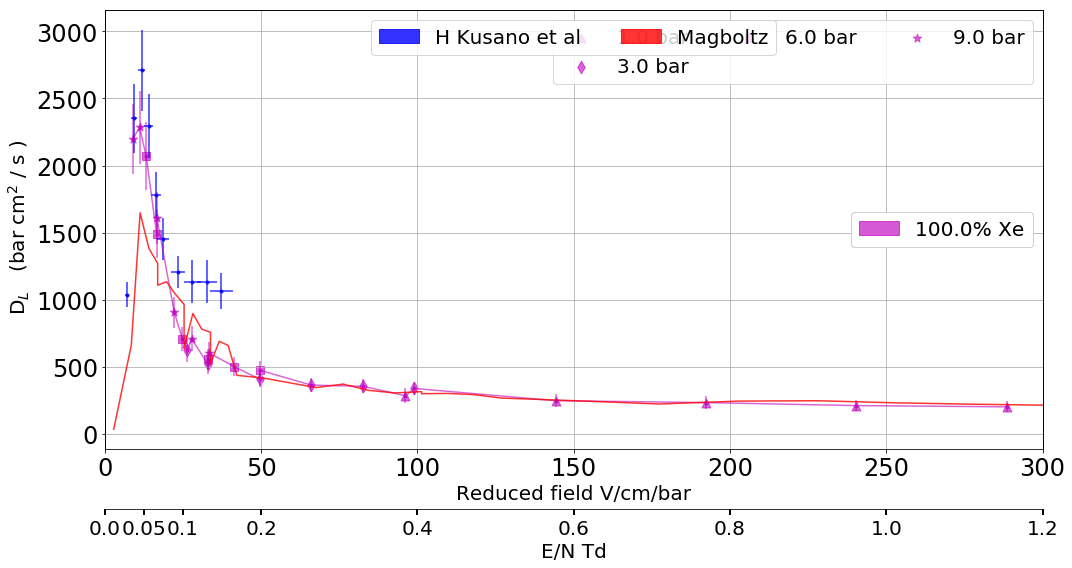

In [251]:
Pat = []
plt.figure(figsize=(15,8))
ax1 = plt.subplot(111)

#for x in range(0,len(Percents)):
for x in [3]:
    Pc = Percents[x]
    DATA = Data[Data[:,0].astype(float)==Pc]
    vals = DATA[:,:-1].astype(float)
    mark = DATA[:,-1]
    d = 13.48
    E = vals[:,1]
    P = vals[:,2]
    dt = vals[:,3]*1e6
    sigma = (vals[:,4]*1e6)**2
    
    V = d/(dt)
    R = E/P
    Dslash = sigma*V**3/(2*d)*1e6*P
    
    B = (.1/(sigma))**2+9*(0.5/dt)**2+4*(0.1/(d))**2+(0.1/(P))**2
    
    DeltaD = Dslash*np.sqrt((B))
    
    SORT = R.argsort()
    lab = str(Pc)+'% Xe'
    color = COL[x]
    pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
    Pat.append(pat)
    LABB = np.rint(P).astype(str)
    
    plt.plot(R[SORT], Dslash[SORT], alpha=0.6,color=color)
    plt.errorbar(R, Dslash,yerr=DeltaD+Dslash*0.1, alpha=0.6,color=color,fmt='.')
    
    for x, y, m, L in zip(R, Dslash, mark,LABB):
        plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=80,label=L+" bar") 

        
plt.errorbar(xdata,ydata,xerr=xerr,yerr=yerr,fmt='.',color='blue',alpha=0.8)
lb1 = mpatches.Patch(color='blue', label='H Kusano et al',alpha=0.8)
plt.plot(XX,YY,color='r',alpha=0.8)
lb2 = mpatches.Patch(color='r', label='Magboltz',alpha=0.8)

legend3=plt.legend(handles=[lb1,lb2],loc='upper center',ncol=5,fontsize=20)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=3,fontsize=20)
PAT.append(lb1)
legend1=plt.legend(handles=Pat,loc='center right',ncol=5,fontsize=20)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)
plt.gca().add_artist(legend3)

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid()
ax1.set_xlabel("Reduced field V/cm/bar",fontsize=20)
ax1.set_ylabel(r" D$_L$   (bar cm$^2$ / s )",fontsize=20)
plt.xlim(0,300)

ax2 = ax1.twiny()

# Decide the ticklabel position in the new x-axis,
# then convert them to the position in the old x-axis
N1 = 2.5e19
Td = 1e-17
N2 = P*N1
Townsend = (E/N2)/(Td)

newlabel = [0.0,0.05,0.1, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2]#[0,50,100,150,200,250,300] # labels of the xticklabels: the position in the new x-axis
k2degc = lambda t: (t*N1)*Td# convert function: from Kelvin to Degree Celsius
newpos   = [k2degc(t) for t in newlabel]   # position of the xticklabels in the old x-axis

ax2.set_xticks(newpos)
ax2.set_xticklabels(newlabel)

ax2.xaxis.set_tick_params(which='both',width=2,length=6)
#ax2.set_xscale("log", nonposx='clip')
#ax2.spines["bottom"].set_position(("axes", 0.1))
ax2.spines['bottom'].set_position(('outward', 60))# shift axis
ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
ax2.set_xlabel('E/N Td',fontsize=20)
ax2.set_xlim(ax1.get_xlim())
plt.xticks(fontsize=20)

plt.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/DslashSTARBAR"+".png")
plt.show()

In [234]:
newlabel

[0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2]

In [235]:
newpos

[0.0, 0.0008, 0.0016, 0.0024, 0.0032, 0.003999999999999999, 0.0048]

In [209]:
N1 = 2.5e19
Td = 1e-17
N2 = P*N1
Townsend = (E/N2)/(Td)

In [219]:
Townsend

array([0.38461538, 0.57692308, 0.76923077, 0.96153846, 1.15384615,
       0.10561056, 0.1320132 , 0.1980198 , 0.2640264 , 0.330033  ,
       0.3960396 , 0.05289256, 0.0661157 , 0.09917355, 0.1322314 ,
       0.16528926, 0.19834711, 0.03551609, 0.04439512, 0.06659267,
       0.08879023, 0.11098779, 0.13318535])

In [202]:
newpos

[0.0,
 19.999999999999996,
 39.99999999999999,
 59.99999999999999,
 79.99999999999999,
 99.99999999999999,
 119.99999999999999]

(-5.0, 105.0)

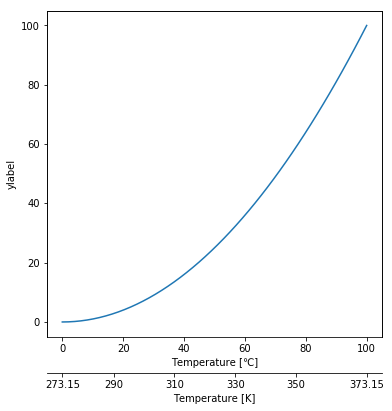

In [158]:
xx = np.linspace(0,100,50)
yy = (xx/10)**2
plt.figure(figsize=(6,6))
# Plot the data
ax1 = plt.subplot(111)
ax1.plot(xx,yy)
ax1.set_ylabel(r'ylabel')
ax1.set_xlabel(u'Temperature [\u2103]')

# Set scond x-axis
ax2 = ax1.twiny()

# Decide the ticklabel position in the new x-axis,
# then convert them to the position in the old x-axis
newlabel = [273.15,290,310,330,350,373.15] # labels of the xticklabels: the position in the new x-axis
k2degc = lambda t: t-273.15 # convert function: from Kelvin to Degree Celsius
newpos   = [k2degc(t) for t in newlabel]   # position of the xticklabels in the old x-axis

ax2.set_xticks(newpos)
ax2.set_xticklabels(newlabel)

ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
ax2.spines['bottom'].set_position(('outward', 36))
ax2.set_xlabel('Temperature [K]')
ax2.set_xlim(ax1.get_xlim())


In [132]:
DeltaD+Dslash*0.5

array([ 169.98622881,  148.15876431,  139.97203927,  126.80986601,
        121.72763782,  335.5351339 ,  278.70842401,  220.66566573,
        197.99595203,  194.1007718 ,  186.33197193, 1081.53145204,
        781.77013228,  373.90083242,  297.25766449,  269.32882724,
        256.05370187, 1139.48450494, 1185.42084295,  836.71896724,
        475.69005756,  376.61866826,  323.87421421])

In [105]:
np.sqrt(B)

array([0.05002662, 0.05032384, 0.05060442, 0.05095296, 0.05128446,
       0.02019962, 0.020496  , 0.02112674, 0.02173159, 0.02225681,
       0.0229348 , 0.0123675 , 0.01316296, 0.0144557 , 0.01539457,
       0.01616292, 0.01681802, 0.0095557 , 0.01003759, 0.01168567,
       0.01296476, 0.01407176, 0.01512994])

In [106]:
Dslash

array([ 283.8385101 ,  246.9683788 ,  232.90234162,  210.39648861,
        201.40987468,  623.42092524,  516.86710603,  407.11193465,
        363.27290456,  354.528348  ,  338.18630762, 2068.32957449,
       1493.09946543,  708.46828574,  558.08503503,  501.77939417,
        474.01720883, 2196.90748955, 2284.32769648, 1607.60679277,
        905.63223561,  709.03432229,  603.0000401 ])

In [122]:
XXX = np.array([  2.81481481,   8.44444444,  11.25925926,  14.07407407,
        16.88888889,  16.88888889,  19.7037037 ,  22.51851852,
        25.33333333,  25.33333333,  25.33333333,  28.14814815,
        30.96296296,  33.77777778,  33.77777778,  36.59259259,
        39.40740741,  42.22222222,  50.66666667,  50.66666667,
        67.55555556,  76.        ,  76.        ,  84.44444444,
        92.88888889, 101.33333333, 101.33333333, 109.77777778,
       118.22222222, 126.66666667, 152.        , 177.33333333,
       202.66666667, 228.        , 253.33333333, 278.66666667,
       304.        , 329.33333333, 354.66666667])

YYY = np.array([1208.06192218, 2622.65751253, 2782.95341178, 2206.5801764 ,
       1937.13155241, 1786.7293096 , 1755.76267449, 1640.18762347,
       1554.09864953, 1286.00538177, 1255.35170092, 1466.20069551,
       1340.51979375, 1317.31597365, 1097.89365663, 1255.98052266,
       1216.46309979,  980.49761083,  944.75521303,  944.75548585,
        839.0146336 ,  852.51141004,  857.82787085,  788.13940045,
        762.72931377,  767.01193198,  748.96443736,  739.68335622,
        723.59901912,  684.07559719,  645.78502241,  606.08680087,
        623.39578972,  618.5271399 ,  592.71763353,  572.45328186,
        556.26782759,  552.70947142,  540.25919839])

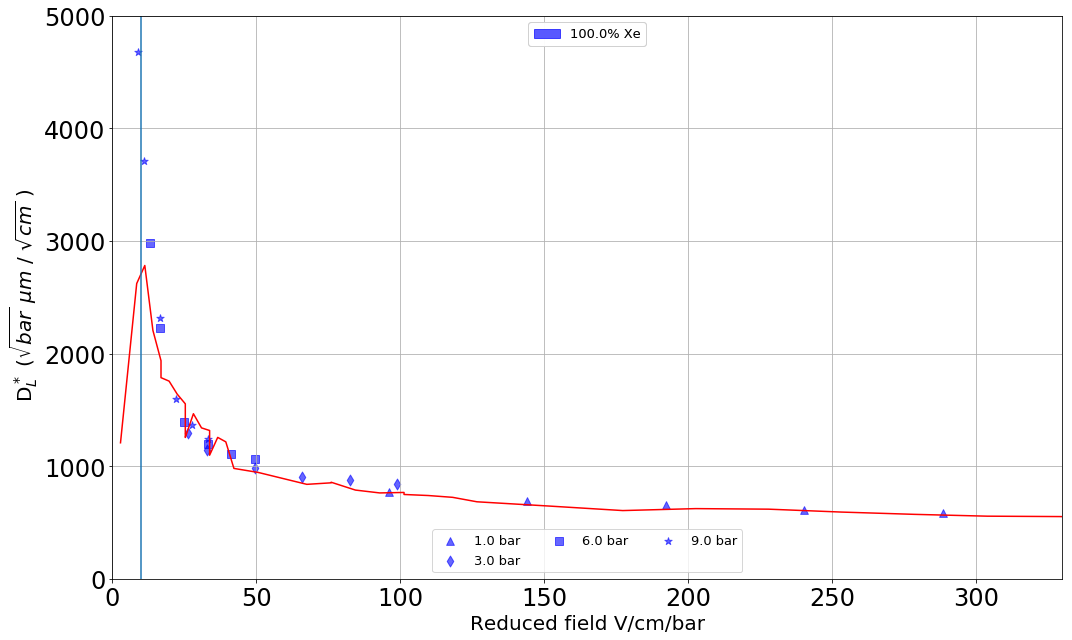

In [123]:
Pat = []
plt.figure(figsize=(15,9))
#for x in range(0,len(Percents)):
for x in [-1]:
    Pc = Percents[x]
    DATA = Data[Data[:,0].astype(float)==Pc]
    vals = DATA[:,:-1].astype(float)
    mark = DATA[:,-1]
    
    d =14.128
    E = vals[:,1]
    P = vals[:,2]
    dt = vals[:,3]*1e6
    sigma = (vals[:,4]*1e6)**2
    sigma = sigma
    V = d/(dt)
    V = V
    R = E/P 
    
    A = sigma*V**2*P*1e6/d
    B = (0.05/(2*sigma))**2+(0.5/dt)**2+(0.1/(2*d))**2+(0.1/(2*P))**2
    DeltaD = np.sqrt((A)*(B))
    
    
    Dslash = sigma*V**3/(2*d)*1e6*P
    Dstar  = np.sqrt(2*Dslash/V)*10
    SORT = R.argsort()
    lab = str(Pc)+'% Xe'
    color = COL[x]
    pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
    Pat.append(pat)
    LABB = np.rint(P).astype(str)
    
    #plt.errorbar(R,Dstar,yerr=DeltaD*100,marker=None,lins)
    #plt.plot(R[SORT], Dstar[SORT], alpha=0.6,color=color)
    for x, y, m, L in zip(R, Dstar, mark,LABB):
        plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=60,label=L+" bar") 
    
plt.plot(XXX,YYY,color='r')  
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='lower center',ncol=3,fontsize=13)

legend1=plt.legend(handles=Pat,loc='upper center',ncol=5,fontsize=13)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)


plt.xlim(0,330)#
#plt.xlim(0,50)

#plt.xlim(0,120)#
plt.ylim(0,5000)#plt.legend(loc='upper right',fontsize=14,ncol=3)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid()
plt.xlabel("Reduced field V/cm/bar",fontsize=20)
plt.ylabel(r" D$^*_L$ ($\sqrt{bar}$ $\mu m$ / $\sqrt{cm}$ )",fontsize=20)
plt.tight_layout()
plt.axvline(10)
#plt.savefig("/Users/austinmcdonald/Desktop/DslashSTARBAR"+".png")
plt.show()

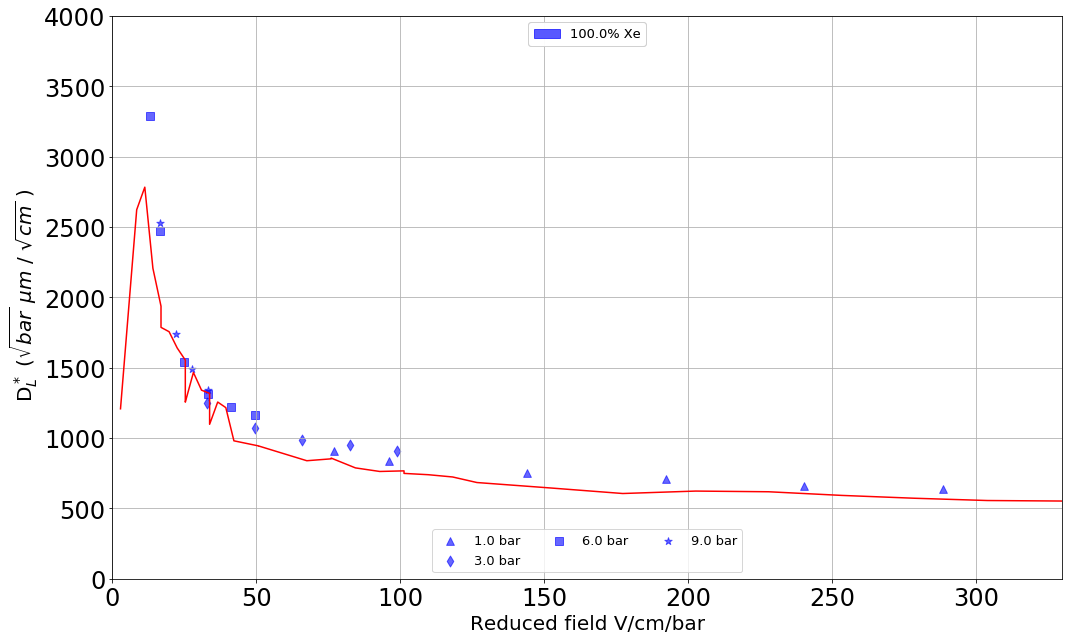

In [36]:
Pat = []
plt.figure(figsize=(15,9))
#for x in range(0,len(Percents)):
for x in [-1]:
    Pc = Percents[x]
    DATA = Data[Data[:,0].astype(float)==Pc]
    vals = DATA[:,:-1].astype(float)
    mark = DATA[:,-1]
    d = 13.48
    E = vals[:,1]
    P = vals[:,2]
    dt = vals[:,3]*1e6
    sigma = (vals[:,4]*1e6)**2-0.0125
    sigma = sigma
    V = d/(dt)
    V = V*1.075
    R = E/P 
    Dslash = sigma*V**3/(2*d)*1e6*P
    Dstar  = np.sqrt(2*Dslash/V)*10
    SORT = R.argsort()
    lab = str(Pc)+'% Xe'
    color = COL[x]
    pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
    Pat.append(pat)
    LABB = np.rint(P).astype(str)
    
    #plt.plot(R[SORT], Dstar[SORT], alpha=0.6,color=color)
    for x, y, m, L in zip(R, Dstar, mark,LABB):
        plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=60,label=L+" bar") 
    
plt.plot(XXX,YYY,color='r')  
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='lower center',ncol=3,fontsize=13)

legend1=plt.legend(handles=Pat,loc='upper center',ncol=5,fontsize=13)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)


plt.xlim(0,330)#
#plt.xlim(0,50)

#plt.xlim(0,120)#
plt.ylim(0,4000)#
#plt.legend(loc='upper right',fontsize=14,ncol=3)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid()
plt.xlabel("Reduced field V/cm/bar",fontsize=20)
plt.ylabel(r" D$^*_L$ ($\sqrt{bar}$ $\mu m$ / $\sqrt{cm}$ )",fontsize=20)
plt.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/DslashSTARBAR"+".png")
plt.show()

In [64]:
P

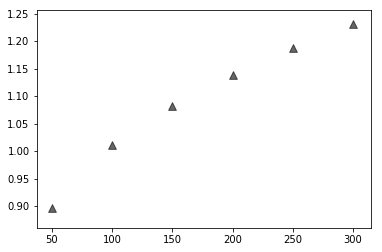

In [55]:
for Pc in [100]:
    DATA = Data[Data[:,0].astype(float)==Pc]
    vals = DATA[:,:-1].astype(float)
    mark = DATA[:,-1]
    d = 134.8
    V = d/(vals[:,3]*1e6)
    R = vals[:,1]/vals[:,2]
    
    #plt.scatter(R,V)
    
    for x, y, m in zip(R, V, mark):
        plt.scatter(x, y, alpha=0.6,marker=m,color='k',s=60) 
    
    

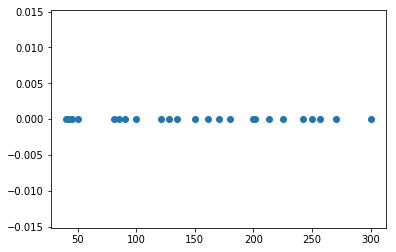

In [46]:
plt.scatter(vals[:,1]/vals[:,2],vals[:,4])

In [23]:
Data[Data[:,0]==80]

/Users/austinmcdonald/miniconda/envs/IC-3.6-2018-11-14/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


array([], shape=(0, 24, 6), dtype='<U32')

In [14]:
Data[:,0]

array(['80', '80', '80', '80', '80', '80', '85', '85', '85', '85', '85',
       '85', '90', '90', '90', '90', '90', '90', '100', '100', '100',
       '100', '100', '100'], dtype='<U32')

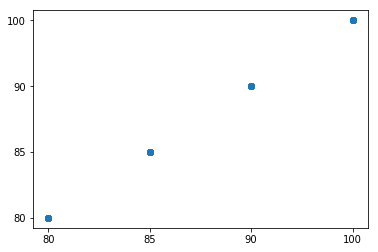

In [8]:
plt.scatter(Data[:,0],Data[:,0])